In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from os import path
import yaml
import copy 
from statsmodels.stats.proportion import multinomial_proportions_confint

In [ ]:
os.chdir('..')

In [59]:
from mega_analysis.crosstab.mega_analysis.MEGA_ANALYSIS import MEGA_ANALYSIS
from mega_analysis.crosstab.mega_analysis.QUERY_SEMIOLOGY import QUERY_SEMIOLOGY
from mega_analysis.crosstab.file_paths import file_paths
from mega_analysis.crosstab.lobe_top_level_hierarchy_only import top_level_lobes
from mega_analysis.semiology import recursive_items

In [13]:
repo_dir, resources_dir, excel_path, semiology_dict_path = file_paths()

Semio2Brain_Database = r'/Volumes/Encrypted/Semiology-Visualisation-Tool/resources/__Semio2Brain Database v1.1.0.xlsx'

with open(semiology_dict_path) as f:
    SemioDict = yaml.load(f, Loader=yaml.FullLoader)

In [14]:
(original_df, 
df_ground_truth, df_study_type,
num_database_articles, num_database_patients, num_database_lat, num_database_loc) = \
                MEGA_ANALYSIS(Semio2Brain_Database)
df = original_df.copy()

In [15]:
semiology_list = list(recursive_items(SemioDict))

In [16]:
semiology_query_results = {}
for semiology in semiology_list:
    query_inspection, num_query_lat, num_query_loc = QUERY_SEMIOLOGY(df,
                                                                 semiology_term=semiology,
                                                                 ignore_case=True,
                                                                 semiology_dict_path=None,
                                                                 all_columns_wanted = True)
                                                                         # col1=col1, col2=col1)
    one_query_result = {
        'query_inspection': query_inspection,
        'num_query_lat': num_query_lat,
        'num_query_loc': num_query_loc
    }
    semiology_query_results[semiology] = one_query_result

In [17]:
n_results = []
for k, v in semiology_query_results.items():
    n_results.append(v['num_query_loc'])
n_results = np.array(n_results)
top_10_semiologies = np.array(semiology_list)[(n_results>170)]

In [66]:
set(top_level) - set(regions_of_interest)

{'Cerebellum',
 'FP',
 'FT',
 'FTP',
 'Hypothalamus',
 'PO',
 'Perisylvian',
 'Sub-Callosal Cortex',
 'TO',
 'TP',
 'TPO Junction'}

In [65]:
regions_of_interest = ['Mesial Temporal',
                         'Lateral Temporal',
                         'Anterior (temporal pole)',
                         'Posterior Temporal',
                         'TL',
                         'FL',
                         'PL',
                         'OL',
                         'INSULA',
                         'CING',
                        ]
# regions_of_interest.sort()
temporal_regions = ['Anterior (temporal pole)',
 'Lateral Temporal',
 'Mesial Temporal',
 'Posterior Temporal']

In [32]:
all_regions = """TL
Anterior (temporal pole)
Lateral Temporal
STG (includes Transverse Temporal Gyrus, Both Planum)
Transverse Temporal Gyrus (Heschl's, BA 41,  42, ?opercula)
Planum Temporale
Planum Polare
MTG
ITG
Mesial Temporal
Ant Mesial Temporal
Post Mesial Temporal
Enthorinal Cortex
Fusiform
AMYGD
PARAHIPPOCAMPUS
HIPPOCAMPUS
Posterior Temporal
Basal (including Fusiform OTMG)
OTMG (fusiform)
FL
frontal pole
Pre-frontal (BA 8, 9, 10, 11, 12, 13, 14, 24, 25, 32, 44, 45, 46, 47)
DL-PFC (BA 46) (include subgroups BA 9, 8, 10 - frontopolar/anterior prefrontal)
gyrus rectus (basal = gyrus rectus and OFC)
Orbito-frontal (BA 10, 11, 12/47) (basal = gyrus rectus and OFC)
Post OF
Lat OF
Med OF
Medial Frontal (include medial premotor and its constituents as its subsets)
Primary Motor Cortex (Pre-central gyrus, BA 4, Rolandic)
medial precentral
Rolandic Operculum (low BA4)
SFG (F1)
Med SFG
Post SFG
Ant SFG
MFG (F2)
Ant MFG
Mid MFG
Post MFG
Pars Triangularis (subgroup IFG)
Pars opercularis (BA 44)(subgroup IFG, ?opercula)
Premotor frontal (posterior frontal)
Ant Premotor (BA 8, frontal-eye-fields)
Medial Premotor (including pre SMA)
SMA (pre-central gyrus; posterior SFG, MFG)
SSMA
CING
Cingulum (WM)
Ant Cing (frontal, genu)
Dorsal Ant Cing (BA 32)
Middle Cingulate
Post Cing
Isthmus
PL
Primary Sensory Cortex (post-central gyrus)
medial anterior parietal
Sup. pariet. lobule
Precuneus (medial post sup parietal lobule)
Inferior Parietal Lobule
Supramarg gyrus (post part of parietal operculum)
Angular gyrus (BA 39)
parietal operculum (ceiling of secondary somatosensory cortex)
OL
Mesial Occipital
Lingual gyrus  (medial and basal)
Cuneus
Lateral Occipital (SOG, IOG, LOG)
Posterior Occipital Gyrus
Superior Occipital Gyrus
INSULA
Ant Ins
Anterior Short Gyrus
Middle Short Gyrus
Post short gyrus
Precentral gyrus
Postcentral gyrus
Posterior long gyrus
Hypothalamus
Sub-Callosal Cortex
Cerebellum
Hemisphere
Vermis
FT
TO
TP
FTP
TPO Junction
PO
FP
Perisylvian""".splitlines()

all_regions += ['''IFG (F3)
(BA 44,45,47)''',
'''Lateral Premotor
(BA 6)''',
'''Pars orbitalis (subgroup of IFG)
(BA 47)''']
# '''Pars opercularis (BA 44)(subgroup IFG, ?opercula)'''

In [33]:
other_regions = set(all_regions) - set(regions_of_interest)
other_regions = list(other_regions)

regions_of_interest_minus_temporal = set(regions_of_interest) - set(temporal_regions)
regions_of_interest_minus_temporal = list(regions_of_interest_minus_temporal)

In [70]:
top_level

['TL',
 'FL',
 'CING',
 'PL',
 'OL',
 'INSULA',
 'Hypothalamus',
 'Sub-Callosal Cortex',
 'Cerebellum',
 'Perisylvian',
 'FT',
 'TO',
 'TP',
 'FTP',
 'TPO Junction',
 'PO',
 'FP']

In [69]:
top_level = top_level_lobes()
top_level_of_interest = [
                         'FL',
                         'PL',
                         'OL',
                         'INSULA',
                         'CING',
                        ]
top_level_all_other = set(top_level) - set(top_level_of_interest) - set('TL')
temporal_low_level = ['Mesial Temporal',
                        'Lateral Temporal',
                        'Anterior (temporal pole)',
                        'Posterior Temporal']

In [34]:
region_names = {'top_level': top_level,
                'top_level_of_interest': top_level_of_interest,
                'top_level_all_other': top_level_all_other,
                'top_level_temporal': ['TL'],
                'low_level_temporal': temporal_low_level,
                'minus_temporal': regions_of_interest_minus_temporal}

In [35]:
def get_proportions(values):
    sum_values = np.sum(values)
    proportions = [value/sum_values for value in values]
    return proportions

In [36]:
def calculate_proportions_and_ci(query_results, region_names, other_included = False, merge_temporal = False):
    region_names_update = copy.deepcopy(region_names['of_interest'])
    if merge_temporal:
        region_names_update = region_names['minus_temporal'] + ['Temporal']
    if other_included:
        region_names_update += ['All other']
    
    for semiology, value in query_results.items():
        query_inspection = query_results[semiology]['query_inspection']
        if merge_temporal == False:
            by_zone = np.array(query_inspection[region_names['of_interest']].sum(0))
        else:
            by_zone = np.array(query_inspection[region_names['minus_temporal']].sum(0))
            temporal_sum = query_inspection[region_names['temporal']].sum().sum()
            by_zone = np.append(by_zone, temporal_sum)
            
        if other_included:
            all_other_zones = query_inspection[region_names['all_other']].sum(0).sum()
            by_zone = np.append(by_zone, all_other_zones)
            
        proportions = get_proportions(by_zone)
        confint = multinomial_proportions_confint(by_zone)
        ci = confint[:,1] - confint[:,0]

        query_results[semiology]['by_zone'] = by_zone
        query_results[semiology]['proportions'] = proportions
        query_results[semiology]['confint'] = confint
        query_results[semiology]['ci'] = ci
        query_results[semiology]['semiology_name'] = semiology
        query_results[semiology]['region_names'] = region_names_update

    return query_results

In [37]:
standard_qr = copy.deepcopy(semiology_query_results)
standard_qr = calculate_proportions_and_ci(standard_qr, region_names, other_included = False, merge_temporal = False, )

<ipython-input-35-94f6c7b79efe>:3: RuntimeWarning: invalid value encountered in double_scalars
  proportions = [value/sum_values for value in values]
/Users/karan/anaconda3/envs/semiology-vis/lib/python3.9/site-packages/statsmodels/stats/proportion.py:257: RuntimeWarning: invalid value encountered in true_divide
  proportions = counts / n


In [38]:
other_qr = copy.deepcopy(semiology_query_results)
other_qr = calculate_proportions_and_ci(other_qr, region_names, other_included = True, merge_temporal = False)

<ipython-input-35-94f6c7b79efe>:3: RuntimeWarning: invalid value encountered in double_scalars
  proportions = [value/sum_values for value in values]


In [45]:
region_names['all_other']

['Post MFG',
 'Isthmus',
 'Middle Short Gyrus',
 'Orbito-frontal (BA 10, 11, 12/47) (basal = gyrus rectus and OFC)',
 'Anterior Short Gyrus',
 'Post short gyrus',
 'Pars Triangularis (subgroup IFG)',
 'Fusiform',
 'Primary Motor Cortex (Pre-central gyrus, BA 4, Rolandic)',
 'Hemisphere',
 'Cerebellum',
 'Med SFG',
 'Cuneus',
 'Post SFG',
 'TL',
 'parietal operculum (ceiling of secondary somatosensory cortex)',
 'MTG',
 'gyrus rectus (basal = gyrus rectus and OFC)',
 'TPO Junction',
 'Middle Cingulate',
 'TP',
 'FT',
 'Medial Premotor (including pre SMA)',
 'Posterior long gyrus',
 'medial precentral',
 'Sup. pariet. lobule',
 'Mesial Occipital',
 'Primary Sensory Cortex (post-central gyrus)',
 'Rolandic Operculum (low BA4)',
 'MFG (F2)',
 'PARAHIPPOCAMPUS',
 'SMA (pre-central gyrus; posterior SFG, MFG)',
 'Lateral Occipital (SOG, IOG, LOG)',
 'Angular gyrus (BA 39)',
 'Vermis',
 'Pre-frontal (BA 8, 9, 10, 11, 12, 13, 14, 24, 25, 32, 44, 45, 46, 47)',
 'TO',
 'PO',
 'Perisylvian',
 'Sup

In [58]:
other_qr['Epigastric']['query_inspection'][region_names['all_other']].sum().sum()

985.0

In [39]:
temporal_other_qr = copy.deepcopy(semiology_query_results)
temporal_other_qr = calculate_proportions_and_ci(temporal_other_qr, region_names, other_included = True, merge_temporal=True)

<ipython-input-35-94f6c7b79efe>:3: RuntimeWarning: invalid value encountered in double_scalars
  proportions = [value/sum_values for value in values]


In [40]:
def plot_semiology(query_result, ax=None):
    x = query_result['proportions']
    y = query_result['region_names']
    xerr = query_result['confint'].T
    sns.pointplot(x=x,
                y=y,
                join=False,
                ci=False,
                ax=ax,
                color="#42847D")
    ax.errorbar(x, y, xerr=xerr, ls='none', color='#42847D')
    ax.title.set_text(query_result['semiology_name'])
    ax.axvline(x=1/55,ymin=-0.2,ymax=1.2,c="darksalmon",linewidth=1, zorder=0,clip_on=False)

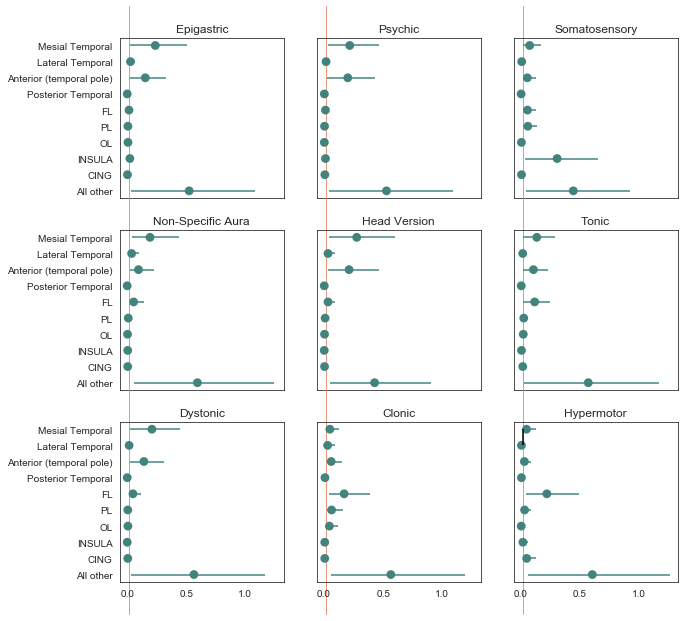

In [41]:
sns.set_style("white")

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
for i, semiology in enumerate(top_10_semiologies[:9]):
    coord = divmod(i, 3)
    plot_semiology(other_qr[semiology], axs[coord[0], coord[1]])
    
plt.vlines(1/55, 0, 1)